### 0. IMPORT AND SETUP

In [ ]:
!pip install biopython #only need to run once
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from os import chdir,getcwd
from Bio import Entrez

In [ ]:
#Run once to mount the link to Drive on YOUR implementation of Google Colab
from google.colab import drive #for cloud instance only
drive.mount('/content/drive') #for cloud instance only, if you put the Fall20_IntrotoDS_Final_Project folder in a subdirectory of My Drive, the paths won't work, make sure to add shared folder to your Drive
directory_path = r'/content/drive/MyDrive/Fall20_IntrotoDS_Final_Project/' #update this to your local directory

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
chdir(directory_path)
from crawler import *
from database import *

### 1. TERM SEARCH

In [ ]:
id_list = get_ids_from_term('hiv')['IdList']
id_list[0:20] #preview

['33306722',
 '33305262',
 '33304109',
 '33304107',
 '33301507',
 '33301478',
 '33299552',
 '33299357',
 '33299356',
 '33298652',
 '33297825',
 '33296400',
 '33295592',
 '33295531',
 '33295530',
 '33295527',
 '33294621',
 '33294479',
 '33294468',
 '33294453']

In [ ]:
id_chunks = list(chunks(id_list, 200))
print(id_chunks[0][0:10]) #id_list has been chunked into sections of 200. preview first 10 in first chunk
print('Chunk Length:',len(id_chunks[0]))
print('Number of Chunks in List',len(id_chunks))

['33306722', '33305262', '33304109', '33304107', '33301507', '33301478', '33299552', '33299357', '33299356', '33298652']
Chunk Length: 200
Number of Chunks in List 66


In [ ]:
chunkj = ','.join(id_chunks[0]) #['33152053', '33151997', '33150233', '3315...'] TO '32081778,32267890,20348614'
chunkj[0:100] #first 100 characters

'33306722,33305262,33304109,33304107,33301507,33301478,33299552,33299357,33299356,33298652,33297825,3'

In [ ]:
id_check = '32081778,32267890,20348614' #200 at a time 
retrieval = execute_search_on_ids(chunkj)
retrieval[0:5][0:100] #show first 100 characters of first five results for first section of 200 ids

[{'MedlineCitation': DictElement({'GeneralNote': [], 'SpaceFlightMission': [], 'CitationSubset': ['IM'], 'OtherAbstract': [], 'OtherID': [], 'KeywordList': [], 'PMID': StringElement('33306722', attributes={'Version': '1'}), 'DateRevised': {'Year': '2020', 'Month': '12', 'Day': '11'}, 'Article': DictElement({'ELocationID': [StringElement('10.1371/journal.pone.0243636', attributes={'EIdType': 'doi', 'ValidYN': 'Y'})], 'Language': ['eng'], 'ArticleDate': [DictElement({'Year': '2020', 'Month': '12', 'Day': '11'}, attributes={'DateType': 'Electronic'})], 'Journal': {'ISSN': StringElement('1932-6203', attributes={'IssnType': 'Electronic'}), 'JournalIssue': DictElement({'Volume': '15', 'Issue': '12', 'PubDate': {'Year': '2020'}}, attributes={'CitedMedium': 'Internet'}), 'Title': 'PloS one', 'ISOAbbreviation': 'PLoS One'}, 'ArticleTitle': 'Predictors and outcome of first line treatment failure among under-five children with community acquired severe pneumonia at Bugando Medical Centre, Mwanza,

In [ ]:
# main function in the crawler file extracts results for all terms matching query within publication date window
final_result = extraction('hiv') #get_ids_from_term, chunks, and execute_search_on_ids run inside this function
combined_df = pd.DataFrame(final_result)
combined_df.head()

,PMID,Title,AuthorList,PubDate,AbtractText
0,33306722,Predictors and outcome of first line treatment...,"[Restituta Phabian Muro, Tulla Sylvester Masoz...",{'Year': '2020'},[Despite recent advances in management and pre...
1,33305262,CYP46A1-dependent and independent effects of e...,"[Natalia Mast, Nicole El-Darzi, Alexey M Petro...",{'Year': '2020'},[Cholesterol excess in the brain is mainly dis...
2,33304109,Dietary Diversity and Associated Factors Among...,"[Melese Markos, Tsegaye Lolaso, Abrham Mengist...",{'Year': '2020'},[Nutrition is a significant factor in all stag...
3,33304107,Dyslipidemia and Associated Factors in Tenofov...,[Taklo Simeneh Yazie],{'Year': '2020'},[Studies showed conflicting results regarding ...
4,33301507,Prevalence of and risk factors for hepatitis B...,"[Mary Adetola Lawal, Oluwafunmilayo Funke Aden...",{'Year': '2020'},[The study was carried out to determine the pr...


In [ ]:
# save pandas dataframe of results to new file name
combined_df.to_csv(directory_path+'hiv_pull.csv',index=False)

### 2. AUTHOR SEARCH

In [ ]:
# create a SQL table in the directory_path folder using .csv file from PubMed term search
csv_to_table(directory_path,"hiv_pull.csv")

Done! CSV file is imported to a table


In [ ]:
# query the SQL database for author name components
author_query("Nigus Alemu Hailu",directory_path)

Select PMID, Title, AuthorList, PubDate From pubmed_data Where AuthorList LIKE '%Nigus%Alemu%Hailu%'


[(33170882,
  'The magnitude of anemia and associated factors among adult diabetic patients in Tertiary Teaching Hospital, Northern Ethiopia, 2019, cross-sectional study.',
  "['Nigus Alemu Hailu', 'Tesfaye Tolessa', 'Zenawi Hagos Gufue', 'Etsay Weldekidan Tsegay', 'Kidanemaryam Berhe Tekola']",
  "{'Year': '2020'}")]

In [ ]:
author_query("Nigus Hailu",directory_path)

Select PMID, Title, AuthorList, PubDate From pubmed_data Where AuthorList LIKE '%Nigus%Hailu%'


[(33170882,
  'The magnitude of anemia and associated factors among adult diabetic patients in Tertiary Teaching Hospital, Northern Ethiopia, 2019, cross-sectional study.',
  "['Nigus Alemu Hailu', 'Tesfaye Tolessa', 'Zenawi Hagos Gufue', 'Etsay Weldekidan Tsegay', 'Kidanemaryam Berhe Tekola']",
  "{'Year': '2020'}"),
 (32060161,
  'Time to recovery from severe acute malnutrition and its predictors: a multicentre retrospective follow-up study in Amhara region, north-west Ethiopia.',
  "['Adhanom Gebreegziabher Baraki', 'Temesgen Yihunie Akalu', 'Haileab Fekadu Wolde', 'Wubet Worku Takele', 'Worku Nigussu Mamo', 'Behailu Derseh', 'Hanna Demelash Desyibelew', 'Abel Fekadu Dadi']",
  "{'Year': '2020', 'Month': '02', 'Day': '13'}")]

In [ ]:
#example of reversed order not working
author_query("Hailu Nigus",directory_path)

Select PMID, Title, AuthorList, PubDate From pubmed_data Where AuthorList LIKE '%Hailu%Nigus%'


[]

In [ ]:
author_query("Hailu",directory_path)

Select PMID, Title, AuthorList, PubDate From pubmed_data Where AuthorList LIKE '%Hailu%'


[(33170882,
  'The magnitude of anemia and associated factors among adult diabetic patients in Tertiary Teaching Hospital, Northern Ethiopia, 2019, cross-sectional study.',
  "['Nigus Alemu Hailu', 'Tesfaye Tolessa', 'Zenawi Hagos Gufue', 'Etsay Weldekidan Tsegay', 'Kidanemaryam Berhe Tekola']",
  "{'Year': '2020'}"),
 (33147218,
  'Frequency of MTB and rifampicin resistance MTB using Xpert-MTB/RIF assay among adult presumptive tuberculosis patients in Tigray, Northern Ethiopia: A cross sectional study.',
  "['Araya Gebreyesus Wasihun', 'Tsehaye Asmelash Dejene', 'Genet Gebrehiwet Hailu']",
  "{'Year': '2020'}"),
 (33116920,
  'Condom Utilization and Affecting Factors Among People Living with HIV/AIDS Attending ART Clinics in Addis Ababa, Ethiopia.',
  "['Rahel Hailu Geleta', 'Mesafint Abeje Tiruneh']",
  "{'Year': '2020'}"),
 (33116432,
  'Health-Related Quality of Life and Associated Factors Among Adult HIV Mono-Infected and TB/HIV Co-Infected Patients in Public Health Facilities in 

### 3. VISUALIZATION

In [ ]:
date_cleaner = pd.read_csv(directory_path+"date_cleaner.csv")

def month_extractor(raw_date):
  clist = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
  nlist = ["'Month': '01'","'Month': '02'","'Month': '03'","'Month': '04'","'Month': '05'","'Month': '06'","'Month': '07'","'Month': '08'","'Month': '09'","'Month': '10'","'Month': '11'","'Month': '12'"]
  if raw_date.startswith("{'Year':"):
    for i in range(len(clist)):
      if clist[i] in raw_date:
        return i+1
      if nlist[i] in raw_date:
        return i+1
  if raw_date.startswith("{'MedlineDate':"):
    for i in date_cleaner['dirty_date']:
      if raw_date == i:
        return float(date_cleaner.loc[date_cleaner['dirty_date'] == i]['month'])

def visualization(file):
  filepath = directory_path + file
  df = pd.read_csv(filepath)
  #create a new column 'Month'
  df['Month'] = df.apply(lambda row : month_extractor(row['PubDate']),axis=1)

  #create a new dataframe with new column "count_month"
  df_count = df.groupby(["Month"])["Month"].count().reset_index(name="Count")

  #show the number of publications in each month
  sns.barplot(x="Month",y="Count", ci=None, data=df_count)
  plt.ylabel("Number of Publications")
  plt.title("Number of publications in each month", size=20)
  a = plt.gca()
  for p in a.patches:
    a.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), fontsize=8, ha='center', va='bottom')  
  plt.show()

  #visualize the trend of the publication numbers over time  
  ax = sns.lineplot(x= 'Month', y= 'Count', marker= "o", data=df_count)
  plt.title("Trend of the publication numbers over time", size=20)
  ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
  plt.show()

  # create a histogram
  sns.histplot(df_count, x='Count')
  plt.xlabel("Number of publications per month")
  plt.show()

  #create a boxplot to show summary statistics
  sns.boxplot(x="Count",showmeans=True,meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black"},
              data=df_count)
  plt.title("Summary statistics for the publication numbers per month", size=15)
  
  # generate summary statistics
  print(df_count['Count'].describe())

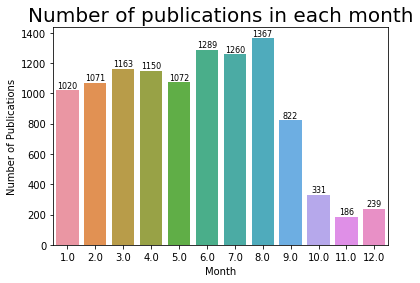

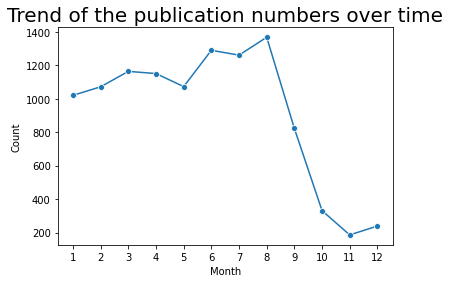

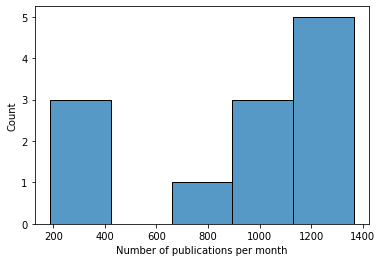

count      12.000000
mean      914.166667
std       424.055921
min       186.000000
25%       699.250000
50%      1071.500000
75%      1187.250000
max      1367.000000
Name: Count, dtype: float64


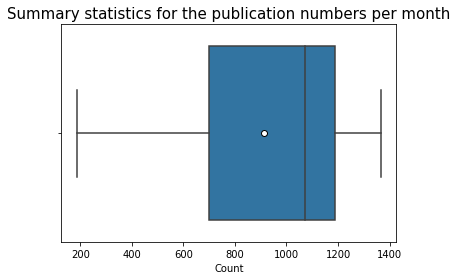

In [ ]:
# create visualization dashboard plots
visualization('hiv_pull.csv')